In [1]:
# Import libraries
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Latex, Math, Image
import sys
from Vehicle import UnitConversion, steerFunc, steerPlot

# Unit conversion
mm_pr_in, m_pr_in, N_pr_lb, lb_pr_N, ms_pr_kmh, ms_pr_mph, Nm_pr_ftlbs = UnitConversion()

# Simulation

In [2]:
# Initial velocity in x
v_x0 = 0.05

# Initial position
x0 = 0
y0 = 0

# Initial yaw angle
gamma0 = 0

# Initial values
Yzero=[v_x0,0,0,gamma0,x0,y0]

# Time interval
end_time = 30
t_span = np.arange(0, end_time, 0.01)
t_interval = (0, end_time)

# Friction constant
mu = 0.4

# velocity
def vel_d(t):
    #return 0.5
    if t<1.5:
        return 0.07
    if t>=1.5:
        return 0.05

# Steering angle
steer = 4
def delta_f(t):
    if t>2 and t<4:
        return np.deg2rad(steer)
    else:
        return 0

# yaw
yaw = 2
def yaw_d(t):
    return np.deg2rad(yaw)

winch = False

# Vacuum normal force at suspension, friction force from vacuum sheet
# From digital twin
N_s = 1186
F = 98

The simulation is run:

In [3]:
t_span, delta_f_arr, v_x, v_y, V, gamma, dgamma, beta, X, Y, X_t, Y_t, F_ty, F_y, N, skid, F_skid, X_le, Y_le, X_te, Y_te, le_attach, te_attach = steerFunc(delta_f, vel_d, yaw_d, N_s, F, t_interval, t_span, tire_model='nonlinear', winch=winch, mu=mu, Yzero=Yzero)

# Plots

## Trajectory

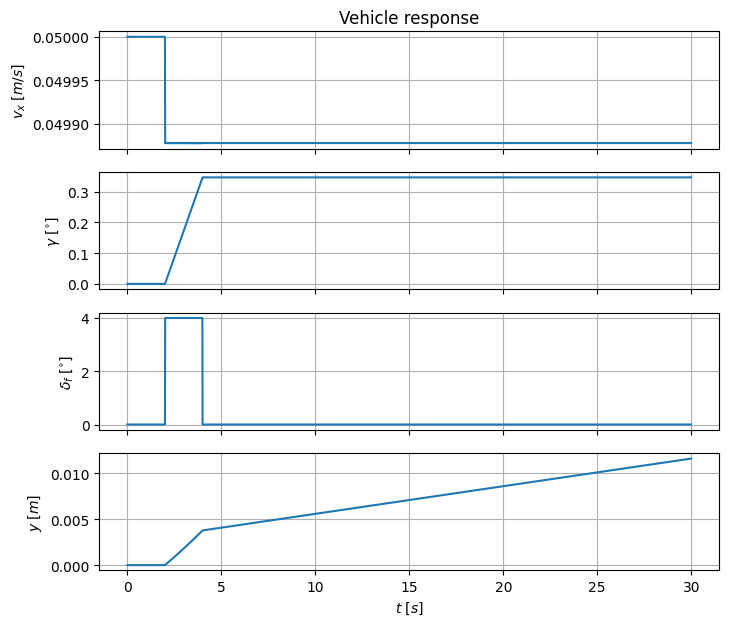

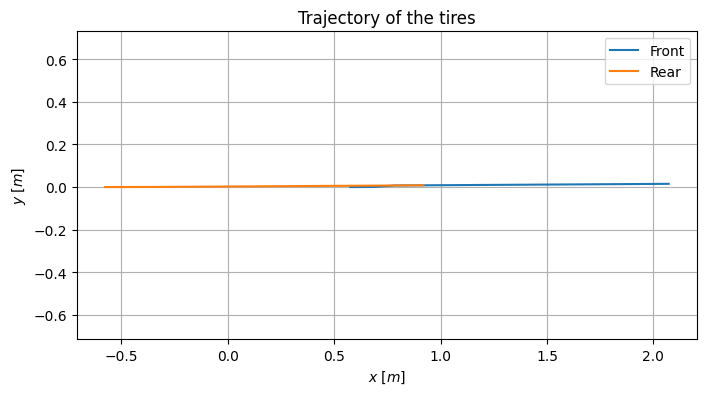

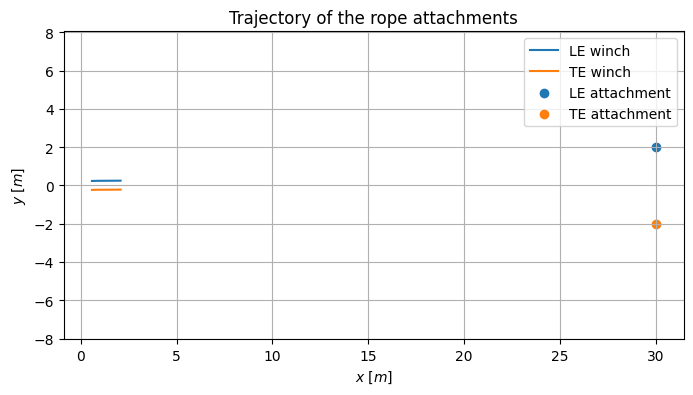

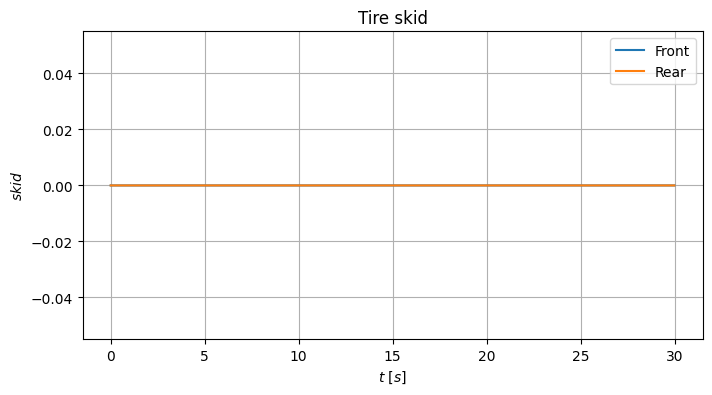

In [4]:
plot_name = f'winch{winch}_yaw{yaw}_steer{steer}_{end_time}s'
steerPlot(t_span=t_span, delta_f=delta_f_arr, v_x=v_x, gamma=gamma, Y=Y, X_t=X_t, Y_t=Y_t, skid=skid, X_le=X_le, Y_le=Y_le, X_te=X_te, Y_te=Y_te, le_attach=le_attach, te_attach=te_attach, plot_name=plot_name)